##**To create an API key for YouTube, you'll need to follow these steps:** ##

Go to the Google Cloud Console: https://console.cloud.google.com/

1. Create a new project or select an existing project from the project dropdown.
2. Click on the project dropdown and select "New Project" if you're creating a new project.

3. Enter a name for your project and click on the "Create" button.

4. Once your project is created, select the project from the project dropdown.

5. In the left sidebar, click on the "APIs & Services" → "Library" menu.

6. Search for "YouTube Data API v3" and click on it when it appears.

7. Click on the "Enable" button to enable the API for your project.

8. In the left sidebar, click on the "APIs & Services" → "Credentials" menu.

9. Click on the "Create Credentials" button and select "API Key" from the dropdown menu.

10. A dialog box will appear, showing your API key. You can copy the API key or restrict it based on your requirements.

11. Make sure to securely store your API key, as it provides access to your project's resources.


In [ ]:
import json
import re
import googleapiclient.discovery
from googlesearch import search

# Define the search query
query = 'site:youtube.com openinapp.co'

# Set the number of video links to retrieve
num_links = 10000

# Initialize the counter
counter = 0

# Perform the Google search and collect the first 10 video links
search_results = search(query)

# Extract the YouTube video links
youtube_video_links = []
for url in search_results:
    if 'watch?v=' in url:
        youtube_video_links.append(url)
        counter += 1

    # Stop the execution if the counter has reached the specified number of video links
    if counter == num_links:
        break

# Extract video IDs from the YouTube video links
video_ids = []
for link in youtube_video_links:
    video_id = re.search(r'(?:watch\?v=|/videos/|embed\/|youtu.be\/|\/v\/|\/e\/|watch\?v=|&v=|\?v=)([^#\&\?\/\s]+)', link)
    if video_id:
        video_ids.append(video_id.group(1))

# Get the channel links using the YouTube Data API
api_key = "API-Key"  # Replace with your own API key
youtube = googleapiclient.discovery.build("youtube", "v3", developerKey=api_key)

channel_links = []
for video_id in video_ids:
    request = youtube.videos().list(
        part="snippet",
        id=video_id
    )
    response = request.execute()
    if 'items' in response and len(response['items']) > 0:
        channel_id = response['items'][0]['snippet']['channelId']
        channel_url = f"https://www.youtube.com/channel/{channel_id}"
        channel_links.append(channel_url)

# Prepare the results in JSON format
results = [{'channel_url': channel_url} for channel_url in channel_links]

# Output the results in JSON format
with open('youtube_channels.json', 'w') as outfile:
    json.dump(results, outfile, indent=4)


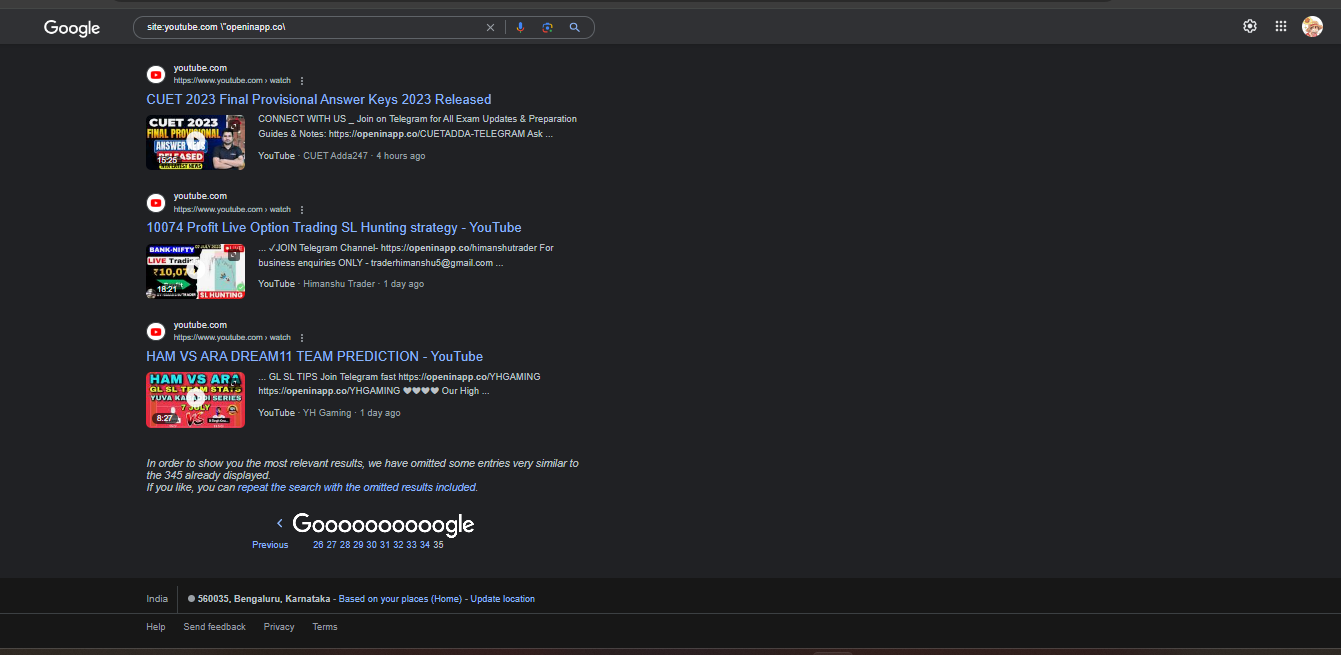

## **The Maximum page was 35** ##